# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")

# 4. Macine Learning Model

In [2]:
data= pd.read_csv('final_features.csv')
data.head()

,Unnamed: 0,id,is_duplicate,freq_qid1_x,freq_qid2_x,q1len_x,q2len_x,q1_n_words_x,q2_n_words_x,word_Common_x,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,0,0,0,1,1,66,57,14,12,10.0,...,89.572089,-110.879569,-100.340596,90.604166,20.295473,-14.674574,-19.159758,-129.747007,-118.292253,89.304251
1,1,1,0,1,1,51,88,8,13,4.0,...,80.583011,52.868427,91.395757,0.832400,-164.617460,102.494180,-85.872281,-65.242727,-116.834744,171.741777
2,2,2,0,1,1,73,59,14,10,4.0,...,88.734341,22.559361,131.338697,128.613064,-43.068860,150.399292,154.158860,-246.701067,4.507912,253.489992
3,3,3,0,1,1,50,65,11,9,0.0,...,46.291135,-82.400769,24.867242,32.917215,-40.122687,21.548114,-81.215482,-164.161980,33.646341,9.997636
4,4,4,0,2,1,76,39,13,7,2.0,...,113.318797,-65.129680,122.982880,-68.149418,-153.339061,-66.136773,8.174143,-33.789423,-25.280121,3.592565


In [3]:
y_true= data['is_duplicate']
data.drop(['Unnamed: 0', 'id', 'is_duplicate' ], axis=1 , inplace =True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split( data, y_true, stratify=y_true, test_size=0.3)

In [5]:
scalar=StandardScaler()
X_train= scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)

In [6]:
print('Number of datapoints in Training Data :', X_train.shape)
print('Number of datapoints in Test Data : ', X_test.shape)

Number of datapoints in Training Data : (105000, 637)
Number of datapoints in Test Data :  (45000, 637)


In [7]:
print('-'*10 , 'Distribution of Output data in Training points' , '-'*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print('Class 0: ',train_distr[0]/train_len , 'Class 1:' , train_distr[1]/train_len)

print('-'*10 , 'Distribution of Output data in Test points' , '-'*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print('Class 0: ',test_distr[0]/test_len , 'Class 1:' , test_distr[1]/test_len)


---------- Distribution of Output data in Training points ----------
Class 0:  0.6276095238095238 Class 1: 0.3723904761904762
---------- Distribution of Output data in Test points ----------
Class 0:  0.6276 Class 1: 0.3724


In [8]:
def plot_confusion_matrix(test_y , predicted_y ):
    C= confusion_matrix(test_y  , predicted_y)
    A= ((C.T/(C.sum(axis=1))).T)
    B= C/C.sum(axis=0)
    plt.figure(figsize=(20,4))
    labels=[1,2]
    cmap= sns.light_palette('blue')
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap , fmt='.3f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Confusion Matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(B, annot=True, cmap=cmap , fmt='.3f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Precision Matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(A, annot=True, cmap=cmap , fmt='.3f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Recall Matrix')
    
    plt.show()

## 4.4 Building a random model (Finding worst-case log-loss)

Log-Loss on Test data using Random MOdel :  0.8793755247345555


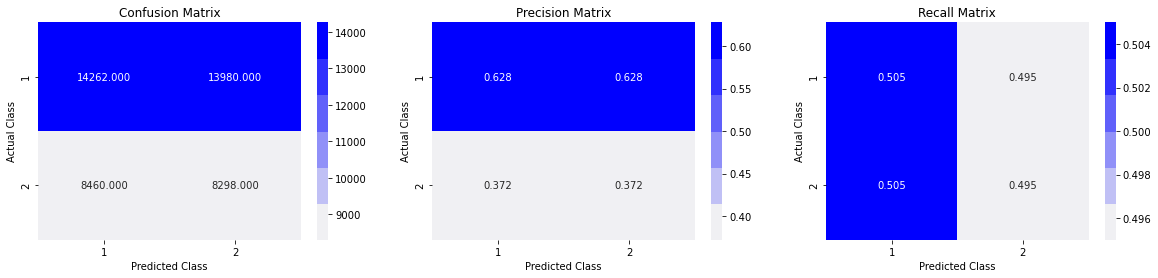

In [9]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = (rand_probs/sum(sum(rand_probs)))[0]
print('Log-Loss on Test data using Random MOdel : ' , log_loss(y_test,predicted_y, eps=1e-15 ))

predicted_y = np.argmax(predicted_y , axis=1)
plot_confusion_matrix(y_test, predicted_y )

## 4.4 Logstic regression with Hyper Parameters Tuning

for value of alpha: 1e-05  Log loss :  0.4455532338265917
for value of alpha: 0.0001  Log loss :  0.4239474699711187
for value of alpha: 0.001  Log loss :  0.41923490887086623
for value of alpha: 0.01  Log loss :  0.4212553190857096
for value of alpha: 0.1  Log loss :  0.44393313164752707
for value of alpha: 1  Log loss :  0.4856520007529773
for value of alpha: 10  Log loss :  0.5436996165155864


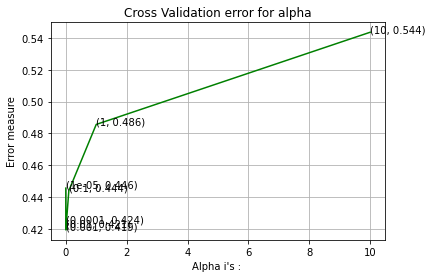

for best value of alpha 0.001 Train loss is :  0.41355234729347806
for best value of alpha 0.001 Test loss is :  0.41923490887086623
NO of datapoints:  45000


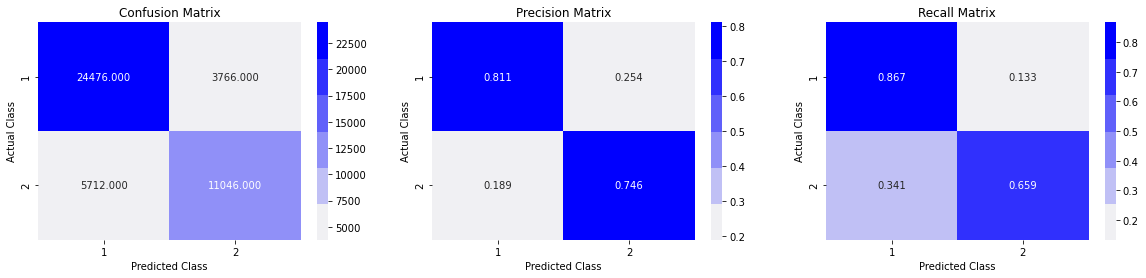

In [10]:
alpha= [10**x for x in range(-5,2)]
log_error_mat=[]
for i in alpha:
    clf=SGDClassifier (loss='log_loss', penalty='l2', alpha=i, random_state=42)
    clf.fit(X_train,y_train)
    sig_clf= CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train,y_train)
    predict_y= sig_clf.predict_proba(X_test)
    log_error_mat.append(log_loss(y_test,predict_y, labels=clf.classes_, eps=1e-15))
    print('for value of alpha:',i," Log loss : ", log_loss(y_test,predict_y, labels=clf.classes_, eps=1e-15))
    
    
    
fig, ax = plt.subplots()
ax.plot(alpha, log_error_mat, c='g')
for i ,txt in enumerate (np.round(log_error_mat,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i], log_error_mat[i]))
plt.grid()
plt.title('Cross Validation error for alpha')
plt.xlabel("Alpha i's : ")
plt.ylabel('Error measure')
plt.show()


best_alpha=np.argmin(log_error_mat)
clf=SGDClassifier (loss='log_loss', penalty='l2', alpha=alpha[best_alpha], random_state=42)
clf.fit(X_train,y_train)
sig_clf= CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(X_train,y_train)

predict_y = sig_clf.predict_proba(X_train)
print('for best value of alpha',alpha[best_alpha], 'Train loss is : ', log_loss(y_train,predict_y,labels =clf.classes_ , eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('for best value of alpha',alpha[best_alpha], 'Test loss is : ', log_loss(y_test,predict_y,labels =clf.classes_ , eps=1e-15))

predicted_y = np.argmax(predict_y, axis=1)
print('NO of datapoints: ',len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## 4.5 Linear SVM with Hyper Parameter Tuning

For Value of Alpha: 1e-05 Log_loss is : 0.4454086435213842
For Value of Alpha: 0.0001 Log_loss is : 0.4265252361983352
For Value of Alpha: 0.001 Log_loss is : 0.42297066009133916
For Value of Alpha: 0.01 Log_loss is : 0.44581424377997175
For Value of Alpha: 0.1 Log_loss is : 0.5517901283257338
For Value of Alpha: 1 Log_loss is : 0.660220656976904
For Value of Alpha: 10 Log_loss is : 0.660220656976904


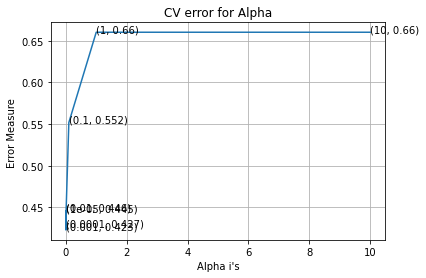

For Value of alpha :  0.001  Train Log Loss :  0.4197524692867572
For Value of alpha :  0.001  Test Log Loss :  0.42297066009133916
NUmber of Data Points : 


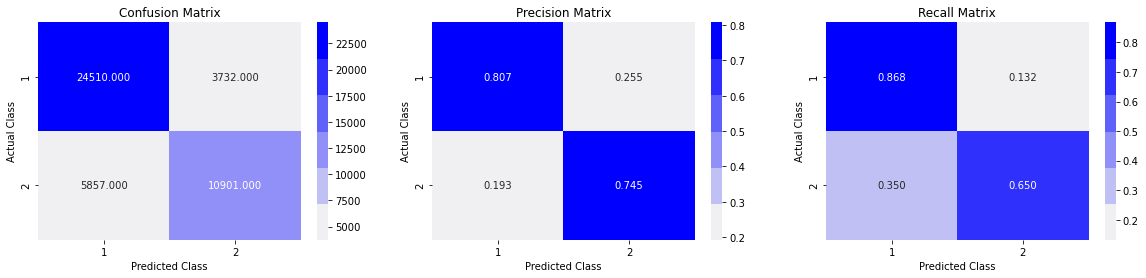

In [11]:
alpha= [10**x for x in range(-5,2)]

log_error_array=[]

for i in alpha :
    clf= SGDClassifier (loss='hinge', alpha=i, penalty='l1', random_state=42)
    clf.fit(X_train , y_train)
    sig_clf= CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y ,labels=clf.classes_ , eps=1e-15))
    print('For Value of Alpha:',i, "Log_loss is :", log_loss(y_test, predict_y ,labels=clf.classes_ , eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array)
for i , txt in enumerate (np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)) , (alpha[i],log_error_array[i]))
plt.title('CV error for Alpha')
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure ")
plt.grid()
plt.show()

best_alpha= np.argmin(log_error_array)
clf= SGDClassifier(loss='hinge', alpha=alpha[best_alpha], penalty='l1', random_state=42)
clf.fit(X_train , y_train)
sig_clf= CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For Value of alpha : ', alpha[best_alpha], ' Train Log Loss : ', log_loss(y_train, predict_y ,labels=clf.classes_ , eps=1e-15))    

predict_y = sig_clf.predict_proba(X_test)
print('For Value of alpha : ', alpha[best_alpha], ' Test Log Loss : ', log_loss(y_test, predict_y ,labels=clf.classes_ , eps=1e-15))    

predicted_y = np.argmax(predict_y , axis=1)
print('NUmber of Data Points : ')
plot_confusion_matrix(y_test, predicted_y)

# XGBoost

In [12]:
import xgboost as xgb
params= {}
params['objective']= 'binary:logistic'
params['eval_metric']='logloss'
params['eta']= 0.02
params['max_depth']= 4

d_train = xgb.DMatrix(X_train , label=y_train)
d_test= xgb.DMatrix(X_test , label=y_test)

watchlist  =  [(d_train,'train'), (d_test,'valid')]

bst= xgb.train(params, d_train, 400 , watchlist , early_stopping_rounds=20 , verbose_eval=10 )

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print('The Test LOG_LOSS is :', log_loss(y_test,predict_y, labels=clf.classes_ , eps= 1e-15))

[0]	train-logloss:0.68541	valid-logloss:0.68540
[10]	train-logloss:0.62171	valid-logloss:0.62170
[20]	train-logloss:0.57444	valid-logloss:0.57461
[30]	train-logloss:0.53911	valid-logloss:0.53944
[40]	train-logloss:0.51197	valid-logloss:0.51242
[50]	train-logloss:0.49080	valid-logloss:0.49140
[60]	train-logloss:0.47398	valid-logloss:0.47468
[70]	train-logloss:0.46056	valid-logloss:0.46137
[80]	train-logloss:0.44978	valid-logloss:0.45067
[90]	train-logloss:0.44068	valid-logloss:0.44167
[100]	train-logloss:0.43327	valid-logloss:0.43439
[110]	train-logloss:0.42717	valid-logloss:0.42842
[120]	train-logloss:0.42183	valid-logloss:0.42327
[130]	train-logloss:0.41722	valid-logloss:0.41879
[140]	train-logloss:0.41332	valid-logloss:0.41507
[150]	train-logloss:0.40987	valid-logloss:0.41178
[160]	train-logloss:0.40680	valid-logloss:0.40892
[170]	train-logloss:0.40403	valid-logloss:0.40636
[180]	train-logloss:0.40147	valid-logloss:0.40403
[190]	train-logloss:0.39919	valid-logloss:0.40198
[200]	train

Total number of data points : 45000


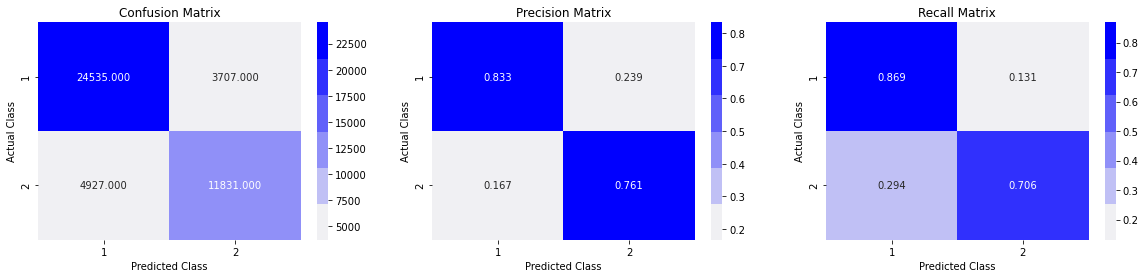

In [13]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Result

In [15]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "TEST_LOG_LOSS"]
x.add_row(["Random Model", 0.8793755247345555 ])
x.add_row(["Logistic Regression",0.41923490887086623])
x.add_row(["SVM", 0.42297066009133916])
x.add_row(["XGBoost",0.3767614409324533 ])
print(x)

+---------------------+---------------------+
|        Model        |    TEST_LOG_LOSS    |
+---------------------+---------------------+
|     Random Model    |  0.8793755247345555 |
| Logistic Regression | 0.41923490887086623 |
|         SVM         | 0.42297066009133916 |
|       XGBoost       |  0.3767614409324533 |
+---------------------+---------------------+
